In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score 
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score#임포트 
from sklearn.model_selection import cross_val_score, cross_validate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전처리

In [2]:
df= pd.read_csv('../lecture/salary_class.csv')
df.head(3)

,Unnamed: 0,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1


In [3]:
df.shape

(48842, 15)

In [4]:
df.isnull().sum()

Unnamed: 0           0
age                  0
workclass         2799
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64

In [5]:
dfk = df.dropna(subset=['occupation'])
dfk.isnull().sum()

Unnamed: 0          0
age                 0
workclass           0
education           0
education-num       0
marital-status      0
occupation          0
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    811
class               0
dtype: int64

In [6]:
numeric_columns = df.select_dtypes(include=['number']) # 수시형
categorical_columns = df.select_dtypes(exclude=['number']) # 범주형 

In [7]:
numeric_columns

,Unnamed: 0,age,education-num,capital-gain,capital-loss,hours-per-week,class
0,0,25,7,0,0,40,0
1,1,38,9,0,0,50,0
2,2,28,12,0,0,40,1
3,3,44,10,7688,0,40,1
4,4,18,10,0,0,30,0
...,...,...,...,...,...,...,...
48837,48837,27,12,0,0,38,0
48838,48838,40,9,0,0,40,1
48839,48839,58,9,0,0,40,0
48840,48840,22,9,0,0,20,0


In [8]:
category_lst = categorical_columns
def unique(df):
    for i in category_lst:
        print('{}의 고유값 : '.format(i) , df[i].unique())
        print('ㅡ'*50)
unique(df)

workclass의 고유값 :  ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
education의 고유값 :  ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
marital-status의 고유값 :  ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
occupation의 고유값 :  ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' nan
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ
relationship의 고유값 :  ['Own-child' 'Husband' 'Not-in-family' 'Unmarried'

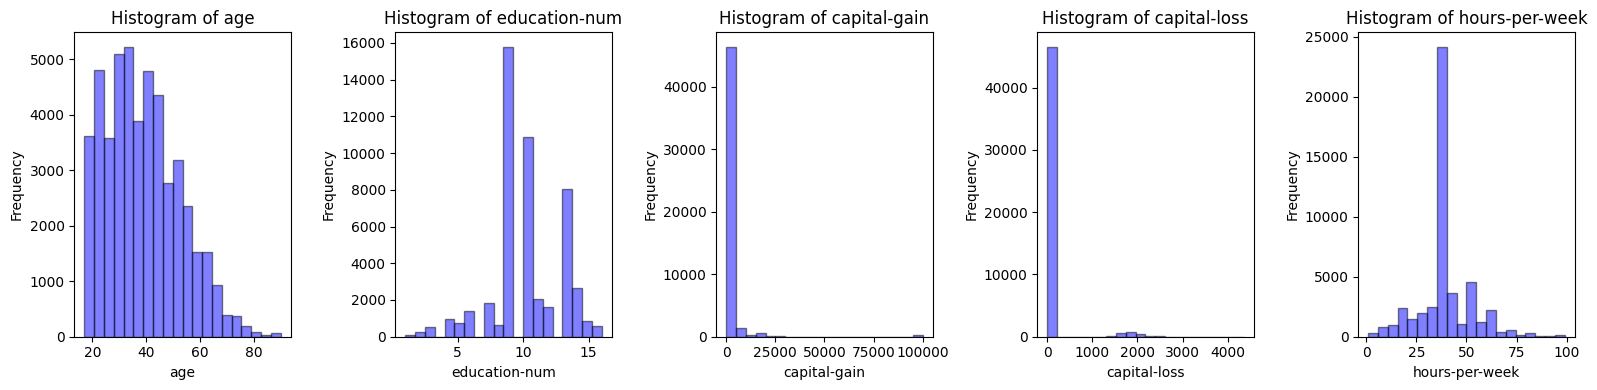

In [11]:
def plot_histograms(df, columns):
    num_cols = len(columns)
    fig, axes = plt.subplots(1, num_cols, figsize=(16, 4))  # 1행 num_cols열의 서브플롯 생성
    
    for i, col in enumerate(columns):
        axes[i].hist(df[col], bins=20, alpha=0.5, color='b', edgecolor='black')
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()
plot_histograms(df, columns=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])

In [12]:
df['age'] = df["age"].map(lambda i: np.log(i)) # age 변환 

c:\Users\User\document\ML study\tset\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\User\document\ML study\tset\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


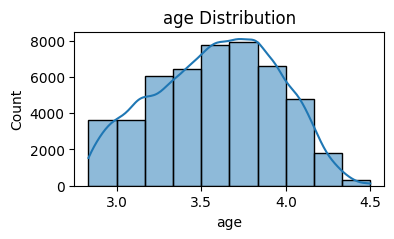

In [13]:
def plot_histogram_one(data, column_name, bins=10, kde=True):
    plt.figure(figsize=(4, 2))
    sns.histplot(data=data, x=column_name, bins=bins, kde=kde)
    plt.title(f'{column_name} Distribution')
    plt.xlabel(column_name)
    plt.ylabel('Count')
    plt.show()
    
plot_histogram_one(data=df, column_name='age', bins=10, kde=True)

In [14]:
def null_pre(df):
    df.dropna(subset=['occupation'],inplace=True)
    df['native-country'].fillna('ohters',inplace=True)
    
def drop_features(df):
    return df.drop(['Unnamed: 0','capital-gain','capital-loss'], axis=1,inplace=True)

null_pre(df)
drop_features(df)

In [15]:
categorical_columns = df.select_dtypes(exclude=['number'])
categorical_columns.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'native-country'],
      dtype='object')

In [16]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status', 'occupation','relationship', 'race', 'sex', 'native-country'])

In [18]:
df

,age,education-num,hours-per-week,class,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,native-country_ohters
0,3.218876,7,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,3.637586,9,50,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,3.332205,12,40,1,False,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,3.784190,10,40,1,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,3.526361,6,30,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,3.295837,12,38,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48838,3.688879,9,40,1,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48839,4.060443,9,40,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
48840,3.091042,9,20,0,False,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False


## 평가

## 다중분류 진행시 평가지표에 대한 가중치 설정 방법
- _micro , _macro , _weighted 이런식으로 사용하면 된다 .
- macro
-> 모든 예측 결과에 대해서 평균을 내어서 계산하는 방법 
- micro
-> 각각의 정답에 대한 개수를 가지고 나눠서 평균값을 구한다
- weighted 
-> 가중 평균값을 구한다 , 가중치를 주고 싶은 것에 줄 수 있다 .


### train, test 분할 방식으로 계산

In [19]:
features = df.drop(['class'],axis=1)
label = df['class']

In [30]:
x_train,x_test,y_train,y_test = train_test_split(features,label,random_state = 0)

lr = LogisticRegression(max_iter = 5000).fit(x_train,y_train)
pred = lr.predict(x_test)

print("정확도 : {:.3f}".format(accuracy_score(y_test,pred)))
print("오차 행렬 \n",confusion_matrix(y_test,pred))

정확도 : 0.836
오차 행렬 
 [[7974  661]
 [1231 1643]]


In [69]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

class_weights = {0: 1 , 1:2}  
# 1. Macro-averaged metrics
macro_precision = precision_score(y_test, y_pred, average='macro', sample_weight=[class_weights[y] for y in y_test])
macro_recall = recall_score(y_test, y_pred, average='macro', sample_weight=[class_weights[y] for y in y_test])
macro_f1 = f1_score(y_test, y_pred, average='macro', sample_weight=[class_weights[y] for y in y_test])

# 2. Micro-averaged metrics
micro_precision = precision_score(y_test, y_pred, average='micro', sample_weight=[class_weights[y] for y in y_test])
micro_recall = recall_score(y_test, y_pred, average='micro', sample_weight=[class_weights[y] for y in y_test])
micro_f1 = f1_score(y_test, y_pred, average='micro', sample_weight=[class_weights[y] for y in y_test])

# 3. Weighted metrics
weighted_precision = precision_score(y_test, y_pred, average='weighted', sample_weight=[class_weights[y] for y in y_test])
weighted_recall = recall_score(y_test, y_pred, average='weighted', sample_weight=[class_weights[y] for y in y_test])
weighted_f1 = f1_score(y_test, y_pred, average='weighted', sample_weight=[class_weights[y] for y in y_test])

# Accuracy (no weighting)
accuracy = accuracy_score(y_test, y_pred)

# Print the results
print("Macro-Precision:", macro_precision)
print("Macro-Recall:", macro_recall)
print("Macro-F1 Score:", macro_f1)
print("Micro-Precision:", micro_precision)
print("Micro-Recall:", micro_recall)
print("Micro-F1 Score:", micro_f1)
print("Weighted-Precision:", weighted_precision)
print("Weighted-Recall:", weighted_recall)
print("Weighted-F1 Score:", weighted_f1)
print("Accuracy:", accuracy)


Macro-Precision: 0.7239787489894416
Macro-Recall: 0.693391900886126
Macro-F1 Score: 0.6981028099796412
Micro-Precision: 0.7758227435646791
Micro-Recall: 0.7758227435646791
Micro-F1 Score: 0.7758227435646791
Weighted-Precision: 0.7244405349523422
Weighted-Recall: 0.7249826869806094
Weighted-F1 Score: 0.7150401737295986
Accuracy: 0.7758227435646791


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

class_weights = {0: 1, 1: 2}

micro_scores = precision_recall_fscore_support(y_test, y_pred, average='micro')
macro_scores = precision_recall_fscore_support(y_test, y_pred, average='macro')
weighted_scores = precision_recall_fscore_support(y_test, y_pred, average='weighted',sample_weight=[class_weights[c] for c in y_test])

print("Micro Scores (Precision, Recall, F1, Support):", micro_scores)
print("Macro Scores (Precision, Recall, F1, Support):", macro_scores)
print("Weighted Scores (Precision, Recall, F1, Support):", weighted_scores)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

Micro Scores (Precision, Recall, F1, Support): (0.7772347127185837, 0.7772347127185837, 0.7772347127185837, None)
Macro Scores (Precision, Recall, F1, Support): (0.7048063745989861, 0.6944795011493724, 0.6991758796480301, None)
Weighted Scores (Precision, Recall, F1, Support): (0.7258845826719644, 0.7261945983379502, 0.7161836341402182, None)
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85      6862
           1       0.57      0.53      0.55      2345

    accuracy                           0.78      9207
   macro avg       0.70      0.69      0.70      9207
weighted avg       0.77      0.78      0.77      9207



### corss_val_score 옵션 이용

In [78]:
## cross val 응용(micro)
model = [DecisionTreeClassifier(),RandomForestClassifier()] 
name = ['DT','RF','LR']

for model ,name in zip(model, name):
    print('******************사용한 알고리즘',name,'******************')
    for score in ['precision_micro','recall_macro','f1_micro']:
        print(score)
        print('--')
        print(cross_val_score(model, features, label, scoring=score,cv=2))

******************사용한 알고리즘 DT ******************
precision_micro
--
[0.77586132 0.77454814]
recall_macro
--
[0.68719552 0.69455001]
f1_micro
--
[0.77425381 0.77732881]
******************사용한 알고리즘 RF ******************
precision_micro
--
[0.81422427 0.80991484]
recall_macro
--
[0.72706513 0.7281161 ]
f1_micro
--
[0.81287744 0.81108794]


In [77]:
## cross val 응용(macro)
model = [DecisionTreeClassifier(),RandomForestClassifier()] 
name = ['DT','RF','LR']

for model ,name in zip(model, name):
    print('******************사용한 알고리즘',name,'******************')
    for score in ['precision_weighted','recall_weighted','f1_weighted']:
        print(score)
        print('--')
        print(cross_val_score(model, features, label, scoring=score,cv=2))

******************사용한 알고리즘 DT ******************
precision_weighted
--
[0.7703421  0.77307035]
recall_weighted
--
[0.77429726 0.77737226]
f1_weighted
--
[0.77138357 0.77532396]
******************사용한 알고리즘 RF ******************
precision_weighted
--
[0.80593003 0.80394513]
recall_weighted
--
[0.81144372 0.81017553]
f1_weighted
--
[0.80803734 0.80759527]
